 ----------------------------------
 # Polymers - Solvents Solubility Data Analysis & Deep Model Construction
 ----------------------------------

#####  The algorithm attempts to model (predict) a solubility of plastic materials in various organic solvents or to demonstrate what plastic materials can be dissolved / not dissolved by a certain organic solvent, based on the solute-solvent molecular formulas. The algorithm is using Deep Neural Network modeling.

- The solubility was divided into three major categories: soluble, 'theta' condition for a neutral interaction (as swollen and/or strongly swollen, slight solubility), and non-soluble.

- This dataset is originally from HSP Book, transformed into csv file.

- The datasets consist of several variables (elements and their number in a solute and in a solvent molecules) and one target variable (solubility parameter).

--------------------------
### Attribute Information:
--------------------------

1. **Solute abbreviation**
2. **Solvent name**
3. **Solubility parameter (1 to 6)**
4. **Number of C-solute elements, etc for C, H, O, N, Cl, Br, S** 
5. **Mw of C-solute unit**
6. **Tot_Mw of C-solute**
7. **Number of C-solvent elements, etc for C, H, O, N, Cl, Br, S**
8. **Mw of C-solvent**


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

from scipy.stats import linregress


In [2]:
from sklearn.preprocessing import FunctionTransformer   
from numpy.random import seed
seed(1)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [3]:
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Full Solubility data preparation

In [5]:
# Read the data
solubility_info = pd.read_csv("data/solubility_matrix.csv")
solubility_info.head()

,Solvent_Solute,A,B,C,D,E,F,G,H,I,...,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH
0,Methanol,5,6,4,5,4,5,6,1,3,...,6,5,6,1,6,5,6,6,6,5
1,Ethanol_96,4,6,4,6,4,1,6,1,1,...,6,5,5,1,6,5,6,6,6,5
2,Ethanol_99p9,5,6,3,5,1,1,6,4,1,...,6,6,4,1,6,5,6,6,6,6
3,n-Propanol,5,6,3,5,1,1,6,4,1,...,5,1,5,1,6,4,6,6,6,6
4,n-Butanol,5,6,3,5,1,1,6,5,1,...,5,1,3,1,6,4,6,6,6,6


In [6]:
len(solubility_info)

88

In [7]:
element_info = pd.read_csv("data/element_info.csv")
#element_info = element_info.set_index('Element')
element_info

,Element,Mw
0,C,12.011
1,H,1.008
2,O,15.999
3,N,14.007
4,Cl,35.450
5,Br,79.904
6,S,32.060


In [8]:
elements_dict = {
    "element": element_info['Element'],
    "Mw": element_info['Mw']
}
elements_dict

{'element': 0     C
 1     H
 2     O
 3     N
 4    Cl
 5    Br
 6     S
 Name: Element, dtype: object, 'Mw': 0    12.011
 1     1.008
 2    15.999
 3    14.007
 4    35.450
 5    79.904
 6    32.060
 Name: Mw, dtype: float64}

In [9]:
elements_dict['Mw']

0    12.011
1     1.008
2    15.999
3    14.007
4    35.450
5    79.904
6    32.060
Name: Mw, dtype: float64

In [10]:
solvents= solubility_info['Solvent_Solute'].to_list()
#solvents

In [11]:
solutes = []
solvents = []
solubility_params = []

solutes1=[]
solvents1=[]
params1 = []

for i, row in solubility_info.iteritems():
    
    if i=='Solvent_Solute':
        solvents = row.to_list()
#        print("len of solvents ", len(solvents))
    else:
        solutes = []
        for j in range(len(solvents)):
            solutes.append(i)
#        print("len of solutes ", len(solutes))
        
        solubility_params = row.to_list()
#        print("len of params ", len(solubility_params))
    
    for j in range(len(solutes)):
        solutes1.append(solutes[j])
        solvents1.append(solvents[j])
        params1.append(solubility_params[j])
    
    print("len of solutes, solvents and params are ", len(solutes1), len(solvents1), len(params1))

len of solutes, solvents and params are  0 0 0
len of solutes, solvents and params are  88 88 88
len of solutes, solvents and params are  176 176 176
len of solutes, solvents and params are  264 264 264
len of solutes, solvents and params are  352 352 352
len of solutes, solvents and params are  440 440 440
len of solutes, solvents and params are  528 528 528
len of solutes, solvents and params are  616 616 616
len of solutes, solvents and params are  704 704 704
len of solutes, solvents and params are  792 792 792
len of solutes, solvents and params are  880 880 880
len of solutes, solvents and params are  968 968 968
len of solutes, solvents and params are  1056 1056 1056
len of solutes, solvents and params are  1144 1144 1144
len of solutes, solvents and params are  1232 1232 1232
len of solutes, solvents and params are  1320 1320 1320
len of solutes, solvents and params are  1408 1408 1408
len of solutes, solvents and params are  1496 1496 1496
len of solutes, solvents and params a

In [12]:
new_df = pd.DataFrame({
    'solutes': solutes1,
    'solvents': solvents1,
    'solubility_param': params1
})
new_df.head(10)

,solutes,solvents,solubility_param
0,A,Methanol,5
1,A,Ethanol_96,4
2,A,Ethanol_99p9,5
3,A,n-Propanol,5
4,A,n-Butanol,5
5,A,Pentanol-1,4
6,A,2-Ethyl_butanol,3
7,A,2-Ethyl_hexanol,4
8,A,Methyl_isobutyl_carbinol,4
9,A,Propylene_glycol,6


In [13]:
new_df.tail(10)


,solutes,solvents,solubility_param
2894,AH,Ethyl_benzene,6
2895,AH,Styrene,5
2896,AH,Tetralin,4
2897,AH,Hexane,6
2898,AH,Cyclohexane,6
2899,AH,Acetic_acid,4
2900,AH,Formic_acid_90,1
2901,AH,Butyric_acid,6
2902,AH,Benzaldehyde,3
2903,AH,Acetic_anhydride,5


In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 3 columns):
solutes             2904 non-null object
solvents            2904 non-null object
solubility_param    2904 non-null int64
dtypes: int64(1), object(2)
memory usage: 68.2+ KB


In [15]:
len(new_df)


2904

In [16]:
new_df['solubility_category']=''

In [17]:
new_df.head(3)


,solutes,solvents,solubility_param,solubility_category
0,A,Methanol,5,
1,A,Ethanol_96,4,
2,A,Ethanol_99p9,5,


In [19]:
new_df['solubility_category'].loc[(new_df['solubility_param']==1) | (new_df['solubility_param']==2)]='soluble'
new_df.tail()

,solutes,solvents,solubility_param,solubility_category
2899,AH,Acetic_acid,4,
2900,AH,Formic_acid_90,1,soluble
2901,AH,Butyric_acid,6,
2902,AH,Benzaldehyde,3,
2903,AH,Acetic_anhydride,5,


In [20]:
new_df['solubility_category'].loc[(new_df['solubility_param']==3) | (new_df['solubility_param']==4)]='theta'
new_df['solubility_category'].loc[(new_df['solubility_param']==5) | (new_df['solubility_param']==6)]='non-soluble'
new_df.head()

,solutes,solvents,solubility_param,solubility_category
0,A,Methanol,5,non-soluble
1,A,Ethanol_96,4,theta
2,A,Ethanol_99p9,5,non-soluble
3,A,n-Propanol,5,non-soluble
4,A,n-Butanol,5,non-soluble


In [21]:
new_df.tail()

,solutes,solvents,solubility_param,solubility_category
2899,AH,Acetic_acid,4,theta
2900,AH,Formic_acid_90,1,soluble
2901,AH,Butyric_acid,6,non-soluble
2902,AH,Benzaldehyde,3,theta
2903,AH,Acetic_anhydride,5,non-soluble


In [81]:
sol_df=new_df.loc[(new_df['solubility_param']==1) | (new_df['solubility_param']==2), :]
sol_df.loc[:, 'solubility_category']='soluble'
theta_df=new_df.loc[(new_df['solubility_param']==3) | (new_df['solubility_param']==4), :]
theta_df.loc[:, 'solubility_category']='theta'

In [82]:
nonsol_df=new_df.loc[(new_df['solubility_param']==5) | (new_df['solubility_param']==6), :]
nonsol_df.loc[:, 'solubility_category']='non-soluble'

In [83]:
sol_cat_df=pd.concat([nonsol_df, theta_df, sol_df], axis=0, sort=False)
sol_cat_df.head()

,solutes,solvents,solubility_param,solubility_category
0,A,Methanol,5,non-soluble
2,A,Ethanol_99p9,5,non-soluble
3,A,n-Propanol,5,non-soluble
4,A,n-Butanol,5,non-soluble
9,A,Propylene_glycol,6,non-soluble


In [84]:
sol_cat_df.tail()

,solutes,solvents,solubility_param,solubility_category
2872,AH,Ethanolamine,1,soluble
2873,AH,Dimethyl_formamide,1,soluble
2876,AH,Morpholine,1,soluble
2878,AH,Pyridine,1,soluble
2900,AH,Formic_acid_90,1,soluble


In [85]:
len(sol_cat_df)

2904

In [28]:
grouped_cats=new_df.groupby(['solubility_category'])
grouped_cats.head()

,solutes,solvents,solubility_param,solubility_category
0,A,Methanol,5,non-soluble
1,A,Ethanol_96,4,theta
2,A,Ethanol_99p9,5,non-soluble
3,A,n-Propanol,5,non-soluble
4,A,n-Butanol,5,non-soluble
5,A,Pentanol-1,4,theta
6,A,2-Ethyl_butanol,3,theta
7,A,2-Ethyl_hexanol,4,theta
8,A,Methyl_isobutyl_carbinol,4,theta
9,A,Propylene_glycol,6,non-soluble


In [86]:
sol_cat_df.to_csv("data/solubility_params_cats.csv")

In [30]:
new_df.to_csv("data/solubility_params_cats_ng.csv")

In [195]:
solubility = pd.read_csv("data/solubility_params_cats_ng.csv")
del solubility['Unnamed: 0']
solubility.head()

,solutes,solvents,solubility_param,solubility_category
0,A,Methanol,5,non-soluble
1,A,Ethanol_96,4,theta
2,A,Ethanol_99p9,5,non-soluble
3,A,n-Propanol,5,non-soluble
4,A,n-Butanol,5,non-soluble


In [196]:
len(solubility)

2904

In [197]:
solvents_info = pd.read_csv("data/solvents_info.csv")
solvents_info.head()

,Solvent,Chem_structure,C,H,O,N,Cl,Br,S
0,Methanol,C1H4O1,1,4.00,1.00,0,0,0,0
1,Ethanol_96,C2H6.08O1.04,2,6.08,1.04,0,0,0,0
2,Ethanol_99p9,C2H6.02O1.01,2,6.02,1.01,0,0,0,0
3,n-Propanol,C3H8O1,3,8.00,1.00,0,0,0,0
4,n-Butanol,C4H10O1,4,10.00,1.00,0,0,0,0


In [198]:
solvents_info = solvents_info.rename(columns = {"Solvent": "solvents"})
#solvents_info.head()

In [199]:
solvents_info['Mw']=""

In [93]:
element_info

,Element,Mw
0,C,12.011
1,H,1.008
2,O,15.999
3,N,14.007
4,Cl,35.450
5,Br,79.904
6,S,32.060


In [94]:
elements = element_info['Element'].to_list()
len(elements)

7

In [95]:
element_dict ={}

In [96]:
for i in range(len(element_info)):
    element_dict.update({element_info['Element'][i]:element_info['Mw'][i]})
element_dict

{'C': 12.011,
 'H': 1.008,
 'O': 15.999,
 'N': 14.007,
 'Cl': 35.45,
 'Br': 79.904,
 'S': 32.06}

In [97]:
elements

['C', 'H', 'O', 'N', 'Cl', 'Br', 'S']

In [200]:
for i in range(len(solvents_info)):
    Mw = 0
    for element in elements:
        Mw += solvents_info.loc[i, element]*element_dict[element]
    solvents_info.loc[i, 'Mw'] = Mw

solvents_info.head()

,solvents,Chem_structure,C,H,O,N,Cl,Br,S,Mw
0,Methanol,C1H4O1,1,4.00,1.00,0,0,0,0,32.042
1,Ethanol_96,C2H6.08O1.04,2,6.08,1.04,0,0,0,0,46.7896
2,Ethanol_99p9,C2H6.02O1.01,2,6.02,1.01,0,0,0,0,46.2492
3,n-Propanol,C3H8O1,3,8.00,1.00,0,0,0,0,60.096
4,n-Butanol,C4H10O1,4,10.00,1.00,0,0,0,0,74.123


In [201]:
solvents_info['total_els']=0

In [202]:
for i in range(len(solvents_info)):
    solvents_info.loc[i, 'total_els']=solvents_info.iloc[i, 2:9].sum()
    
solvents_info.head()

,solvents,Chem_structure,C,H,O,N,Cl,Br,S,Mw,total_els
0,Methanol,C1H4O1,1,4.00,1.00,0,0,0,0,32.042,6.00
1,Ethanol_96,C2H6.08O1.04,2,6.08,1.04,0,0,0,0,46.7896,9.12
2,Ethanol_99p9,C2H6.02O1.01,2,6.02,1.01,0,0,0,0,46.2492,9.03
3,n-Propanol,C3H8O1,3,8.00,1.00,0,0,0,0,60.096,12.00
4,n-Butanol,C4H10O1,4,10.00,1.00,0,0,0,0,74.123,15.00


In [203]:
solvents_info.iloc[:, 2:9]=solvents_info.iloc[:, 2:9].div(solvents_info.loc[:,'total_els'], axis=0)*100 

solvents_info.head()

,solvents,Chem_structure,C,H,O,N,Cl,Br,S,Mw,total_els
0,Methanol,C1H4O1,16.666667,66.666667,16.666667,0.0,0.0,0.0,0.0,32.042,6.00
1,Ethanol_96,C2H6.08O1.04,21.929825,66.666667,11.403509,0.0,0.0,0.0,0.0,46.7896,9.12
2,Ethanol_99p9,C2H6.02O1.01,22.148394,66.666667,11.184939,0.0,0.0,0.0,0.0,46.2492,9.03
3,n-Propanol,C3H8O1,25.000000,66.666667,8.333333,0.0,0.0,0.0,0.0,60.096,12.00
4,n-Butanol,C4H10O1,26.666667,66.666667,6.666667,0.0,0.0,0.0,0.0,74.123,15.00


In [204]:
polymer_info=pd.read_csv("data/polymer_info.csv")
polymer_info.tail()

,Abbr,Polymer_name,Monomer_chem_structure,tot_Mw,C,H,O,N,Cl,Br,S
28,AD,"Durez 14383-furfuryl alcohol resin, Hooker Che...",C5H6O2,780000,5.0,6.0,2.0,0.0,0,0,0
29,AE,Piccopale 110-petroleum hydrocarbon resin Penn...,C10H10,3000,10.0,10.0,0.0,0.0,0,0,0
30,AF,"Vipla KR-poly (vinyl chloride), K = 50, Montec...",C2H3Cl,233000,2.0,3.0,0.0,0.0,1,0,0
31,AG,"Piccoumarone 450L-cumarone-indene resin, Penns...",C17H14O,2000,17.0,14.0,1.0,0.0,0,0,0
32,AH,Milled wood lignin-Special sample from prof Bj...,C10H11O3,4475,10.0,11.0,3.0,0.0,0,0,0


In [205]:
polymer_info = polymer_info.rename(columns = {"Abbr": "solutes"})
polymer_info['Mw']=""

In [206]:
for i in range(len(polymer_info)):
    Mw = 0
    for element in elements:
        Mw += polymer_info.loc[i, element]*element_dict[element]
    polymer_info.loc[i, 'Mw'] = Mw

polymer_info.head(3)

,solutes,Polymer_name,Monomer_chem_structure,tot_Mw,C,H,O,N,Cl,Br,S,Mw
0,A,"Lucite 2042-poly (ethyl methacrylate), E. I. d...",C5O2H8,220000,5.0,8.0,2.0,0.0,0,0,0,100.117
1,B,"Poly (methyl methacrylate), Rohm Lnd Haas Co",C5O2H8,200000,5.0,8.0,2.0,0.0,0,0,0,100.117
2,C,"Epikote 1001-epoxy, Shell Chemical Co",C18H20O3,1000,18.0,20.0,3.0,0.0,0,0,0,284.355


In [207]:
polymer_info['total_els']=0

In [208]:
for i in range(len(polymer_info)):
    polymer_info.loc[i, 'total_els']=polymer_info.iloc[i, 4:11].sum()
    
polymer_info.head()

,solutes,Polymer_name,Monomer_chem_structure,tot_Mw,C,H,O,N,Cl,Br,S,Mw,total_els
0,A,"Lucite 2042-poly (ethyl methacrylate), E. I. d...",C5O2H8,220000,5.0,8.0,2.0,0.0,0,0,0,100.117,15.0
1,B,"Poly (methyl methacrylate), Rohm Lnd Haas Co",C5O2H8,200000,5.0,8.0,2.0,0.0,0,0,0,100.117,15.0
2,C,"Epikote 1001-epoxy, Shell Chemical Co",C18H20O3,1000,18.0,20.0,3.0,0.0,0,0,0,284.355,41.0
3,D,Plexal P65-66 oil length alkyd Polyplex,C10H8O4,35000,10.0,8.0,4.0,0.0,0,0,0,192.17,22.0
4,E,"Pentalyn 830-alcohol soluble rosin resin, Herc...",C23H33O2,1500,23.0,33.0,2.0,0.0,0,0,0,341.515,58.0


In [209]:
polymer_info.iloc[:, 4:11]=polymer_info.iloc[:, 4:11].div(polymer_info.loc[:,'total_els'], axis=0)*100 
polymer_info.head()

,solutes,Polymer_name,Monomer_chem_structure,tot_Mw,C,H,O,N,Cl,Br,S,Mw,total_els
0,A,"Lucite 2042-poly (ethyl methacrylate), E. I. d...",C5O2H8,220000,33.333333,53.333333,13.333333,0.0,0.0,0.0,0.0,100.117,15.0
1,B,"Poly (methyl methacrylate), Rohm Lnd Haas Co",C5O2H8,200000,33.333333,53.333333,13.333333,0.0,0.0,0.0,0.0,100.117,15.0
2,C,"Epikote 1001-epoxy, Shell Chemical Co",C18H20O3,1000,43.902439,48.780488,7.317073,0.0,0.0,0.0,0.0,284.355,41.0
3,D,Plexal P65-66 oil length alkyd Polyplex,C10H8O4,35000,45.454545,36.363636,18.181818,0.0,0.0,0.0,0.0,192.17,22.0
4,E,"Pentalyn 830-alcohol soluble rosin resin, Herc...",C23H33O2,1500,39.655172,56.896552,3.448276,0.0,0.0,0.0,0.0,341.515,58.0


In [210]:
solvents_solubility = pd.merge(solubility, solvents_info, how="inner", on=["solvents"])
solvents_solubility.head(3)

,solutes,solvents,solubility_param,solubility_category,Chem_structure,C,H,O,N,Cl,Br,S,Mw,total_els
0,A,Methanol,5,non-soluble,C1H4O1,16.666667,66.666667,16.666667,0.0,0.0,0.0,0.0,32.042,6.0
1,B,Methanol,6,non-soluble,C1H4O1,16.666667,66.666667,16.666667,0.0,0.0,0.0,0.0,32.042,6.0
2,C,Methanol,4,theta,C1H4O1,16.666667,66.666667,16.666667,0.0,0.0,0.0,0.0,32.042,6.0


In [211]:
solvents_solubility.tail(3)

,solutes,solvents,solubility_param,solubility_category,Chem_structure,C,H,O,N,Cl,Br,S,Mw,total_els
2802,AF,Acetic_anhydride,6,non-soluble,C4H6O3,30.769231,46.153846,23.076923,0.0,0.0,0.0,0.0,102.089,13.0
2803,AG,Acetic_anhydride,5,non-soluble,C4H6O3,30.769231,46.153846,23.076923,0.0,0.0,0.0,0.0,102.089,13.0
2804,AH,Acetic_anhydride,5,non-soluble,C4H6O3,30.769231,46.153846,23.076923,0.0,0.0,0.0,0.0,102.089,13.0


In [212]:
len(solvents_solubility)

2805

In [213]:
full_solubility = pd.merge(solvents_solubility, polymer_info, how="inner", on=["solutes"])
full_solubility.head(3)

,solutes,solvents,solubility_param,solubility_category,Chem_structure,C_x,H_x,O_x,N_x,Cl_x,...,tot_Mw,C_y,H_y,O_y,N_y,Cl_y,Br_y,S_y,Mw_y,total_els_y
0,A,Methanol,5,non-soluble,C1H4O1,16.666667,66.666667,16.666667,0.0,0.0,...,220000,33.333333,53.333333,13.333333,0.0,0.0,0.0,0.0,100.117,15.0
1,A,Ethanol_96,4,theta,C2H6.08O1.04,21.929825,66.666667,11.403509,0.0,0.0,...,220000,33.333333,53.333333,13.333333,0.0,0.0,0.0,0.0,100.117,15.0
2,A,Ethanol_99p9,5,non-soluble,C2H6.02O1.01,22.148394,66.666667,11.184939,0.0,0.0,...,220000,33.333333,53.333333,13.333333,0.0,0.0,0.0,0.0,100.117,15.0


In [214]:
full_solubility.tail(3)

,solutes,solvents,solubility_param,solubility_category,Chem_structure,C_x,H_x,O_x,N_x,Cl_x,...,tot_Mw,C_y,H_y,O_y,N_y,Cl_y,Br_y,S_y,Mw_y,total_els_y
2802,AH,Butyric_acid,6,non-soluble,C4H8O2,28.571429,57.142857,14.285714,0.0,0.0,...,4475,41.666667,45.833333,12.5,0.0,0.0,0.0,0.0,179.195,24.0
2803,AH,Benzaldehyde,3,theta,C7H6O,50.000000,42.857143,7.142857,0.0,0.0,...,4475,41.666667,45.833333,12.5,0.0,0.0,0.0,0.0,179.195,24.0
2804,AH,Acetic_anhydride,5,non-soluble,C4H6O3,30.769231,46.153846,23.076923,0.0,0.0,...,4475,41.666667,45.833333,12.5,0.0,0.0,0.0,0.0,179.195,24.0


In [215]:
len(full_solubility)

2805

In [216]:
cols=full_solubility.keys()
cols

Index(['solutes', 'solvents', 'solubility_param', 'solubility_category',
       'Chem_structure', 'C_x', 'H_x', 'O_x', 'N_x', 'Cl_x', 'Br_x', 'S_x',
       'Mw_x', 'total_els_x', 'Polymer_name', 'Monomer_chem_structure',
       'tot_Mw', 'C_y', 'H_y', 'O_y', 'N_y', 'Cl_y', 'Br_y', 'S_y', 'Mw_y',
       'total_els_y'],
      dtype='object')

In [217]:
full_solubility = full_solubility.rename(columns = {
    "Chem_structure": "Solvents_chem_structure",
    "C_x": "C_solvent",
    "H_x": "H_solvent",
    "O_x": "O_solvent",
    "N_x": "N_solvent",
    "Cl_x": "Cl_solvent",
    "Br_x": "Br_solvent",
    "S_x": "S_solvent",
    "Mw_x":"Mw_solvent",

    "C_y": "C_solute",
    "H_y": "H_solute",
    "O_y": "O_solute",
    "N_y": "N_solute",
    "Cl_y": "Cl_solute",
    "Br_y": "Br_solute",
    "S_y": "S_solute",
    "Mw_y":"Mw_unit_solute"
    
})
full_solubility.head(3)

,solutes,solvents,solubility_param,solubility_category,Solvents_chem_structure,C_solvent,H_solvent,O_solvent,N_solvent,Cl_solvent,...,tot_Mw,C_solute,H_solute,O_solute,N_solute,Cl_solute,Br_solute,S_solute,Mw_unit_solute,total_els_y
0,A,Methanol,5,non-soluble,C1H4O1,16.666667,66.666667,16.666667,0.0,0.0,...,220000,33.333333,53.333333,13.333333,0.0,0.0,0.0,0.0,100.117,15.0
1,A,Ethanol_96,4,theta,C2H6.08O1.04,21.929825,66.666667,11.403509,0.0,0.0,...,220000,33.333333,53.333333,13.333333,0.0,0.0,0.0,0.0,100.117,15.0
2,A,Ethanol_99p9,5,non-soluble,C2H6.02O1.01,22.148394,66.666667,11.184939,0.0,0.0,...,220000,33.333333,53.333333,13.333333,0.0,0.0,0.0,0.0,100.117,15.0


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> General information about dataset, and data distributions and spreads.

In [218]:
full_solubility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 2804
Data columns (total 26 columns):
solutes                    2805 non-null object
solvents                   2805 non-null object
solubility_param           2805 non-null int64
solubility_category        2805 non-null object
Solvents_chem_structure    2805 non-null object
C_solvent                  2805 non-null float64
H_solvent                  2805 non-null float64
O_solvent                  2805 non-null float64
N_solvent                  2805 non-null float64
Cl_solvent                 2805 non-null float64
Br_solvent                 2805 non-null float64
S_solvent                  2805 non-null float64
Mw_solvent                 2805 non-null object
total_els_x                2805 non-null float64
Polymer_name               2805 non-null object
Monomer_chem_structure     2805 non-null object
tot_Mw                     2805 non-null int64
C_solute                   2805 non-null float64
H_solute              

In [219]:
model_df1 = full_solubility.drop(['solutes', 'solvents', 'Solvents_chem_structure', 'total_els_x',
                                 'Polymer_name', 'Monomer_chem_structure', 'total_els_y','Br_solute', 'S_solute'], axis=1)
model_df1.head()

,solubility_param,solubility_category,C_solvent,H_solvent,O_solvent,N_solvent,Cl_solvent,Br_solvent,S_solvent,Mw_solvent,tot_Mw,C_solute,H_solute,O_solute,N_solute,Cl_solute,Mw_unit_solute
0,5,non-soluble,16.666667,66.666667,16.666667,0.0,0.0,0.0,0.0,32.042,220000,33.333333,53.333333,13.333333,0.0,0.0,100.117
1,4,theta,21.929825,66.666667,11.403509,0.0,0.0,0.0,0.0,46.7896,220000,33.333333,53.333333,13.333333,0.0,0.0,100.117
2,5,non-soluble,22.148394,66.666667,11.184939,0.0,0.0,0.0,0.0,46.2492,220000,33.333333,53.333333,13.333333,0.0,0.0,100.117
3,5,non-soluble,25.000000,66.666667,8.333333,0.0,0.0,0.0,0.0,60.096,220000,33.333333,53.333333,13.333333,0.0,0.0,100.117
4,5,non-soluble,26.666667,66.666667,6.666667,0.0,0.0,0.0,0.0,74.123,220000,33.333333,53.333333,13.333333,0.0,0.0,100.117


# <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0e92ea"> Univariate Analysis

In [220]:
model_df1['solubility_param'].value_counts(normalize=True)*100

1    52.477718
6    26.310160
5     9.447415
4     5.632799
3     3.778966
2     2.352941
Name: solubility_param, dtype: float64

In [221]:
model_df1['solubility_category'].value_counts(normalize=True)*100

soluble        54.830660
non-soluble    35.757576
theta           9.411765
Name: solubility_category, dtype: float64

In [222]:
model_df1.isnull().sum()

solubility_param       0
solubility_category    0
C_solvent              0
H_solvent              0
O_solvent              0
N_solvent              0
Cl_solvent             0
Br_solvent             0
S_solvent              0
Mw_solvent             0
tot_Mw                 0
C_solute               0
H_solute               0
O_solute               0
N_solute               0
Cl_solute              0
Mw_unit_solute         0
dtype: int64

# <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0e92ea"> Multivariate analysis

<font color=darkblue>
    
#### Multivariate analysis is performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2
#### ex: Pairplot, 3D scatter plot

In [223]:
model_df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 2804
Data columns (total 17 columns):
solubility_param       2805 non-null int64
solubility_category    2805 non-null object
C_solvent              2805 non-null float64
H_solvent              2805 non-null float64
O_solvent              2805 non-null float64
N_solvent              2805 non-null float64
Cl_solvent             2805 non-null float64
Br_solvent             2805 non-null float64
S_solvent              2805 non-null float64
Mw_solvent             2805 non-null object
tot_Mw                 2805 non-null int64
C_solute               2805 non-null float64
H_solute               2805 non-null float64
O_solute               2805 non-null float64
N_solute               2805 non-null float64
Cl_solute              2805 non-null float64
Mw_unit_solute         2805 non-null object
dtypes: float64(12), int64(2), object(3)
memory usage: 394.5+ KB


In [224]:
model_df1['Mw_solvent_num']=model_df1['Mw_solvent'].astype(float)
model_df1['Mw_unit_solute_num']=model_df1['Mw_unit_solute'].astype(float)
model_df1.drop(['Mw_solvent', 'Mw_unit_solute'], axis=1, inplace=True)

In [225]:
model_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 2804
Data columns (total 17 columns):
solubility_param       2805 non-null int64
solubility_category    2805 non-null object
C_solvent              2805 non-null float64
H_solvent              2805 non-null float64
O_solvent              2805 non-null float64
N_solvent              2805 non-null float64
Cl_solvent             2805 non-null float64
Br_solvent             2805 non-null float64
S_solvent              2805 non-null float64
tot_Mw                 2805 non-null int64
C_solute               2805 non-null float64
H_solute               2805 non-null float64
O_solute               2805 non-null float64
N_solute               2805 non-null float64
Cl_solute              2805 non-null float64
Mw_solvent_num         2805 non-null float64
Mw_unit_solute_num     2805 non-null float64
dtypes: float64(14), int64(2), object(1)
memory usage: 394.5+ KB


In [226]:
# Transform an attribute using a mathematical transformation.
# We might want to do that to change the distribution shape of the data 

log_transformer = FunctionTransformer(np.log1p)

log_transformer

FunctionTransformer(accept_sparse=False, check_inverse=True,
                    func=<ufunc 'log1p'>, inv_kw_args=None, inverse_func=None,
                    kw_args=None, pass_y='deprecated', validate=None)

In [227]:
model_df1['tot_Mw'].isnull().sum()

0

In [228]:
model_df1['tot_Mw_logtrnsfmed'] = log_transformer.fit_transform(model_df1[['tot_Mw']])   # Log Transform the attribute

model_df1.head(3)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


,solubility_param,solubility_category,C_solvent,H_solvent,O_solvent,N_solvent,Cl_solvent,Br_solvent,S_solvent,tot_Mw,C_solute,H_solute,O_solute,N_solute,Cl_solute,Mw_solvent_num,Mw_unit_solute_num,tot_Mw_logtrnsfmed
0,5,non-soluble,16.666667,66.666667,16.666667,0.0,0.0,0.0,0.0,220000,33.333333,53.333333,13.333333,0.0,0.0,32.04200,100.117,12.301387
1,4,theta,21.929825,66.666667,11.403509,0.0,0.0,0.0,0.0,220000,33.333333,53.333333,13.333333,0.0,0.0,46.78960,100.117,12.301387
2,5,non-soluble,22.148394,66.666667,11.184939,0.0,0.0,0.0,0.0,220000,33.333333,53.333333,13.333333,0.0,0.0,46.24915,100.117,12.301387


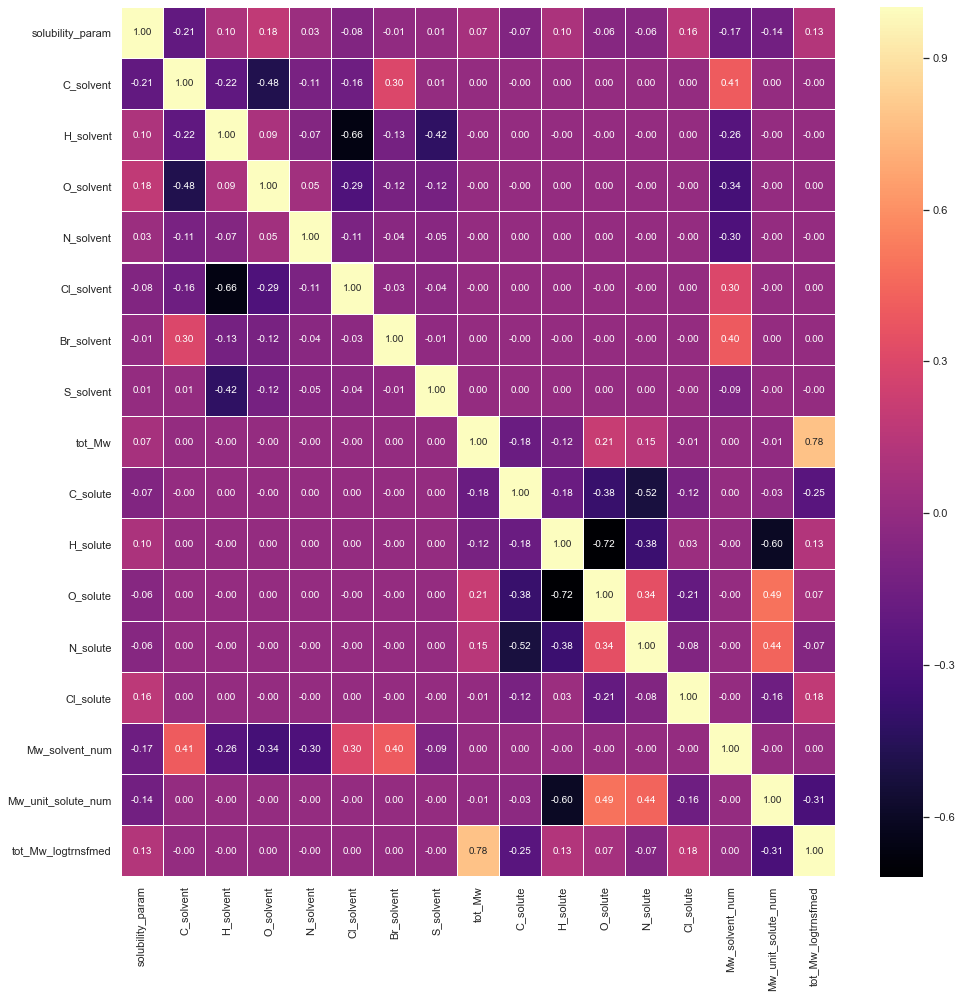

In [229]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(model_df1.corr(), ax=ax, annot=True, linewidth=0.1, fmt='.2f', cmap="magma")
plt.show()


###  <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0e92ea"> Data Preprocessing & Encoding Cathegorical Attributes:
  
<font color=darkblue>

&nbsp;

In [230]:
X = model_df1.drop(['solubility_param', 'solubility_category', 'tot_Mw'], axis=1)
y = model_df1['solubility_category']
print(X.shape, y.shape)

(2805, 15) (2805,)


In [231]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y, test_size=0.10)

In [232]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [233]:
X_test.dtypes

C_solvent             float64
H_solvent             float64
O_solvent             float64
N_solvent             float64
Cl_solvent            float64
Br_solvent            float64
S_solvent             float64
C_solute              float64
H_solute              float64
O_solute              float64
N_solute              float64
Cl_solute             float64
Mw_solvent_num        float64
Mw_unit_solute_num    float64
tot_Mw_logtrnsfmed    float64
dtype: object

In [234]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [235]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [236]:
y_test_categorical

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0

In [237]:
print(y_test_categorical.shape)

(281, 3)


# Create a Deep Learning Model

In [238]:
# Create a Neural Network model here
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=15))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [239]:
# Compile the model
model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [240]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 50)                800       
_________________________________________________________________
dense_34 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_35 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_36 (Dense)             (None, 3)                 153       
Total params: 6,053
Trainable params: 6,053
Non-trainable params: 0
_________________________________________________________________


In [241]:
# Fit the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Train on 2524 samples
Epoch 1/1000
2524/2524 - 0s - loss: 0.9227 - acc: 0.5662
Epoch 2/1000
2524/2524 - 0s - loss: 0.8572 - acc: 0.6078
Epoch 3/1000
2524/2524 - 0s - loss: 0.8349 - acc: 0.6343
Epoch 4/1000
2524/2524 - 0s - loss: 0.8135 - acc: 0.6470
Epoch 5/1000
2524/2524 - 0s - loss: 0.8038 - acc: 0.6529
Epoch 6/1000
2524/2524 - 0s - loss: 0.7890 - acc: 0.6561
Epoch 7/1000
2524/2524 - 0s - loss: 0.7659 - acc: 0.6743
Epoch 8/1000
2524/2524 - 0s - loss: 0.7569 - acc: 0.6834
Epoch 9/1000
2524/2524 - 0s - loss: 0.7437 - acc: 0.6906
Epoch 10/1000
2524/2524 - 0s - loss: 0.7257 - acc: 0.7080
Epoch 11/1000
2524/2524 - 0s - loss: 0.7216 - acc: 0.7084
Epoch 12/1000
2524/2524 - 0s - loss: 0.7109 - acc: 0.7068
Epoch 13/1000
2524/2524 - 0s - loss: 0.7023 - acc: 0.7116
Epoch 14/1000
2524/2524 - 0s - loss: 0.6920 - acc: 0.7211
Epoch 15/1000
2524/2524 - 0s - loss: 0.6829 - acc: 0.7223
Epoch 16/1000
2524/2524 - 0s - loss: 0.6745 - acc: 0.7199
Epoch 17/1000
2524/2524 - 0s - loss: 0.6676 - acc: 0.7290
E

Epoch 142/1000
2524/2524 - 0s - loss: 0.3787 - acc: 0.8439
Epoch 143/1000
2524/2524 - 0s - loss: 0.3762 - acc: 0.8387
Epoch 144/1000
2524/2524 - 0s - loss: 0.3656 - acc: 0.8514
Epoch 145/1000
2524/2524 - 0s - loss: 0.3702 - acc: 0.8498
Epoch 146/1000
2524/2524 - 0s - loss: 0.3695 - acc: 0.8487
Epoch 147/1000
2524/2524 - 0s - loss: 0.3601 - acc: 0.8483
Epoch 148/1000
2524/2524 - 0s - loss: 0.3621 - acc: 0.8487
Epoch 149/1000
2524/2524 - 0s - loss: 0.3608 - acc: 0.8514
Epoch 150/1000
2524/2524 - 0s - loss: 0.3550 - acc: 0.8518
Epoch 151/1000
2524/2524 - 0s - loss: 0.3611 - acc: 0.8542
Epoch 152/1000
2524/2524 - 0s - loss: 0.3664 - acc: 0.8498
Epoch 153/1000
2524/2524 - 0s - loss: 0.3711 - acc: 0.8451
Epoch 154/1000
2524/2524 - 0s - loss: 0.3519 - acc: 0.8613
Epoch 155/1000
2524/2524 - 0s - loss: 0.3622 - acc: 0.8510
Epoch 156/1000
2524/2524 - 0s - loss: 0.3584 - acc: 0.8506
Epoch 157/1000
2524/2524 - 0s - loss: 0.3608 - acc: 0.8570
Epoch 158/1000
2524/2524 - 0s - loss: 0.3580 - acc: 0.85

Epoch 281/1000
2524/2524 - 0s - loss: 0.2695 - acc: 0.8914
Epoch 282/1000
2524/2524 - 0s - loss: 0.2722 - acc: 0.8831
Epoch 283/1000
2524/2524 - 0s - loss: 0.2735 - acc: 0.8807
Epoch 284/1000
2524/2524 - 0s - loss: 0.2629 - acc: 0.8875
Epoch 285/1000
2524/2524 - 0s - loss: 0.2718 - acc: 0.8823
Epoch 286/1000
2524/2524 - 0s - loss: 0.2651 - acc: 0.8899
Epoch 287/1000
2524/2524 - 0s - loss: 0.2521 - acc: 0.8938
Epoch 288/1000
2524/2524 - 0s - loss: 0.2578 - acc: 0.8906
Epoch 289/1000
2524/2524 - 0s - loss: 0.2658 - acc: 0.8926
Epoch 290/1000
2524/2524 - 0s - loss: 0.2566 - acc: 0.8942
Epoch 291/1000
2524/2524 - 0s - loss: 0.2632 - acc: 0.8930
Epoch 292/1000
2524/2524 - 0s - loss: 0.2553 - acc: 0.9010
Epoch 293/1000
2524/2524 - 0s - loss: 0.2600 - acc: 0.8910
Epoch 294/1000
2524/2524 - 0s - loss: 0.2592 - acc: 0.8946
Epoch 295/1000
2524/2524 - 0s - loss: 0.2570 - acc: 0.8930
Epoch 296/1000
2524/2524 - 0s - loss: 0.2580 - acc: 0.8906
Epoch 297/1000
2524/2524 - 0s - loss: 0.2623 - acc: 0.89

Epoch 420/1000
2524/2524 - 0s - loss: 0.2177 - acc: 0.9109
Epoch 421/1000
2524/2524 - 0s - loss: 0.2158 - acc: 0.9045
Epoch 422/1000
2524/2524 - 0s - loss: 0.2210 - acc: 0.9002
Epoch 423/1000
2524/2524 - 0s - loss: 0.2210 - acc: 0.9065
Epoch 424/1000
2524/2524 - 0s - loss: 0.2308 - acc: 0.9013
Epoch 425/1000
2524/2524 - 0s - loss: 0.2187 - acc: 0.9021
Epoch 426/1000
2524/2524 - 0s - loss: 0.2154 - acc: 0.9049
Epoch 427/1000
2524/2524 - 0s - loss: 0.2150 - acc: 0.9061
Epoch 428/1000
2524/2524 - 0s - loss: 0.2133 - acc: 0.9089
Epoch 429/1000
2524/2524 - 0s - loss: 0.2192 - acc: 0.9061
Epoch 430/1000
2524/2524 - 0s - loss: 0.2220 - acc: 0.9053
Epoch 431/1000
2524/2524 - 0s - loss: 0.2252 - acc: 0.9021
Epoch 432/1000
2524/2524 - 0s - loss: 0.2147 - acc: 0.9037
Epoch 433/1000
2524/2524 - 0s - loss: 0.2068 - acc: 0.9085
Epoch 434/1000
2524/2524 - 0s - loss: 0.2151 - acc: 0.9073
Epoch 435/1000
2524/2524 - 0s - loss: 0.2076 - acc: 0.9101
Epoch 436/1000
2524/2524 - 0s - loss: 0.2088 - acc: 0.91

Epoch 559/1000
2524/2524 - 0s - loss: 0.1988 - acc: 0.9109
Epoch 560/1000
2524/2524 - 0s - loss: 0.1943 - acc: 0.9140
Epoch 561/1000
2524/2524 - 0s - loss: 0.1928 - acc: 0.9144
Epoch 562/1000
2524/2524 - 0s - loss: 0.1872 - acc: 0.9124
Epoch 563/1000
2524/2524 - 0s - loss: 0.1780 - acc: 0.9204
Epoch 564/1000
2524/2524 - 0s - loss: 0.1911 - acc: 0.9105
Epoch 565/1000
2524/2524 - 0s - loss: 0.1956 - acc: 0.9144
Epoch 566/1000
2524/2524 - 0s - loss: 0.2067 - acc: 0.9065
Epoch 567/1000
2524/2524 - 0s - loss: 0.1855 - acc: 0.9140
Epoch 568/1000
2524/2524 - 0s - loss: 0.1968 - acc: 0.9164
Epoch 569/1000
2524/2524 - 0s - loss: 0.1896 - acc: 0.9105
Epoch 570/1000
2524/2524 - 0s - loss: 0.1918 - acc: 0.9065
Epoch 571/1000
2524/2524 - 0s - loss: 0.2033 - acc: 0.9085
Epoch 572/1000
2524/2524 - 0s - loss: 0.1913 - acc: 0.9120
Epoch 573/1000
2524/2524 - 0s - loss: 0.1846 - acc: 0.9136
Epoch 574/1000
2524/2524 - 0s - loss: 0.1849 - acc: 0.9152
Epoch 575/1000
2524/2524 - 0s - loss: 0.1902 - acc: 0.91

Epoch 698/1000
2524/2524 - 0s - loss: 0.1880 - acc: 0.9144
Epoch 699/1000
2524/2524 - 0s - loss: 0.1821 - acc: 0.9192
Epoch 700/1000
2524/2524 - 0s - loss: 0.1844 - acc: 0.9089
Epoch 701/1000
2524/2524 - 0s - loss: 0.1774 - acc: 0.9176
Epoch 702/1000
2524/2524 - 0s - loss: 0.1906 - acc: 0.9093
Epoch 703/1000
2524/2524 - 0s - loss: 0.1726 - acc: 0.9184
Epoch 704/1000
2524/2524 - 0s - loss: 0.1738 - acc: 0.9188
Epoch 705/1000
2524/2524 - 0s - loss: 0.1846 - acc: 0.9097
Epoch 706/1000
2524/2524 - 0s - loss: 0.1792 - acc: 0.9204
Epoch 707/1000
2524/2524 - 0s - loss: 0.1861 - acc: 0.9136
Epoch 708/1000
2524/2524 - 0s - loss: 0.1775 - acc: 0.9152
Epoch 709/1000
2524/2524 - 0s - loss: 0.1714 - acc: 0.9180
Epoch 710/1000
2524/2524 - 0s - loss: 0.1732 - acc: 0.9212
Epoch 711/1000
2524/2524 - 0s - loss: 0.1817 - acc: 0.9168
Epoch 712/1000
2524/2524 - 0s - loss: 0.1675 - acc: 0.9180
Epoch 713/1000
2524/2524 - 0s - loss: 0.1788 - acc: 0.9148
Epoch 714/1000
2524/2524 - 0s - loss: 0.1846 - acc: 0.91

Epoch 837/1000
2524/2524 - 0s - loss: 0.1737 - acc: 0.9208
Epoch 838/1000
2524/2524 - 0s - loss: 0.1778 - acc: 0.9192
Epoch 839/1000
2524/2524 - 0s - loss: 0.1697 - acc: 0.9223
Epoch 840/1000
2524/2524 - 0s - loss: 0.1657 - acc: 0.9219
Epoch 841/1000
2524/2524 - 0s - loss: 0.1729 - acc: 0.9156
Epoch 842/1000
2524/2524 - 0s - loss: 0.1741 - acc: 0.9144
Epoch 843/1000
2524/2524 - 0s - loss: 0.1641 - acc: 0.9223
Epoch 844/1000
2524/2524 - 0s - loss: 0.1696 - acc: 0.9184
Epoch 845/1000
2524/2524 - 0s - loss: 0.1778 - acc: 0.9148
Epoch 846/1000
2524/2524 - 0s - loss: 0.1693 - acc: 0.9168
Epoch 847/1000
2524/2524 - 0s - loss: 0.1656 - acc: 0.9152
Epoch 848/1000
2524/2524 - 0s - loss: 0.1714 - acc: 0.9152
Epoch 849/1000
2524/2524 - 0s - loss: 0.1678 - acc: 0.9164
Epoch 850/1000
2524/2524 - 0s - loss: 0.1691 - acc: 0.9168
Epoch 851/1000
2524/2524 - 0s - loss: 0.1639 - acc: 0.9227
Epoch 852/1000
2524/2524 - 0s - loss: 0.1652 - acc: 0.9164
Epoch 853/1000
2524/2524 - 0s - loss: 0.1746 - acc: 0.91

Epoch 976/1000
2524/2524 - 0s - loss: 0.1652 - acc: 0.9144
Epoch 977/1000
2524/2524 - 0s - loss: 0.1562 - acc: 0.9196
Epoch 978/1000
2524/2524 - 0s - loss: 0.1660 - acc: 0.9188
Epoch 979/1000
2524/2524 - 0s - loss: 0.1713 - acc: 0.9188
Epoch 980/1000
2524/2524 - 0s - loss: 0.1609 - acc: 0.9196
Epoch 981/1000
2524/2524 - 0s - loss: 0.1586 - acc: 0.9231
Epoch 982/1000
2524/2524 - 0s - loss: 0.1639 - acc: 0.9212
Epoch 983/1000
2524/2524 - 0s - loss: 0.1696 - acc: 0.9208
Epoch 984/1000
2524/2524 - 0s - loss: 0.1927 - acc: 0.9089
Epoch 985/1000
2524/2524 - 0s - loss: 0.1739 - acc: 0.9101
Epoch 986/1000
2524/2524 - 0s - loss: 0.1647 - acc: 0.9231
Epoch 987/1000
2524/2524 - 0s - loss: 0.1724 - acc: 0.9172
Epoch 988/1000
2524/2524 - 0s - loss: 0.1689 - acc: 0.9140
Epoch 989/1000
2524/2524 - 0s - loss: 0.1740 - acc: 0.9156
Epoch 990/1000
2524/2524 - 0s - loss: 0.1716 - acc: 0.9140
Epoch 991/1000
2524/2524 - 0s - loss: 0.1565 - acc: 0.9188
Epoch 992/1000
2524/2524 - 0s - loss: 0.1581 - acc: 0.92

## Quantify the Trained Model

In [242]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

281/281 - 0s - loss: 1.8338 - acc: 0.7402
Normal Neural Network - Loss: 1.8337679728070189, Accuracy: 0.7402135133743286


In [243]:
predictions = model.predict_classes(X_test_scaled)

In [244]:
encoded_results = label_encoder.inverse_transform(predictions)

In [245]:
deepmodel_df = pd.DataFrame({"Actual_solubility_category": y_test, "Predicted_solubility_category": encoded_results})
deepmodel_df.reset_index(inplace=True)


In [246]:
deepmodel_df.head()

,index,Actual_solubilty_category,Predicted_solubility_category
0,1653,soluble,soluble
1,1197,soluble,soluble
2,1282,soluble,soluble
3,1518,soluble,soluble
4,830,non-soluble,non-soluble


In [247]:
len(deepmodel_df)

281

In [249]:
err=0
for i in range(len(deepmodel_df)):
    if deepmodel_df.loc[i, 'Predicted_solubility_category']!=deepmodel_df.loc[i, 'Actual_solubility_category']:
        err+=1

In [250]:
print(f"percent loss is {round(err/len(deepmodel_df)*100, 2)} %")
print(f"percent acc. is {100-round(err/len(deepmodel_df)*100, 2)} %")

percent loss is 25.98 %
percent acc. is 74.02 %


In [251]:
tested_df=full_solubility.loc[deepmodel_df['index'], ['solutes', 'Polymer_name', 'solvents']]
tested_df

,solutes,Polymer_name,solvents
1653,T,Polysar 5630-styrene-butadiene (SBR) raw elast...,Methyl_isoamyl_ketone
1197,O,Cellolyn 102-modified pentaerythritol ester of...,2-Ethyl_hexanol
1282,P,"Pentalyn 255-akohol soluble resin, Hercules In...",2-Ethyl_hexanol
1518,R,Plexal C34-34 coconut oil-phthalic anhydride a...,Toluene
830,J,Sec_Nitrocellulose-H 23 Hagedorn and Co Osnabr...,1-Chlorobutane
...,...,...,...
470,F,"Butvar B76-poly (vinyl butyral), Shawinigan Re...",Ethyl_acetate
1051,M,"Super Beckacite 1001-Pure Phenolic Resin, Reic...",Carbon_disulfide
1616,T,Polysar 5630-styrene-butadiene (SBR) raw elast...,Ethanol_96
2245,AB,"Cymel 300-hexamethoxy melamine, American Cyana...",Acetone


In [252]:
len(tested_df)

281

In [253]:
tested_df.reset_index(inplace=True)
#tested_df.head()

In [254]:
tested_results=pd.concat([tested_df, deepmodel_df], axis=1)
tested_results.head()

,index,solutes,Polymer_name,solvents,index,Actual_solubilty_category,Predicted_solubility_category
0,1653,T,Polysar 5630-styrene-butadiene (SBR) raw elast...,Methyl_isoamyl_ketone,1653,soluble,soluble
1,1197,O,Cellolyn 102-modified pentaerythritol ester of...,2-Ethyl_hexanol,1197,soluble,soluble
2,1282,P,"Pentalyn 255-akohol soluble resin, Hercules In...",2-Ethyl_hexanol,1282,soluble,soluble
3,1518,R,Plexal C34-34 coconut oil-phthalic anhydride a...,Toluene,1518,soluble,soluble
4,830,J,Sec_Nitrocellulose-H 23 Hagedorn and Co Osnabr...,1-Chlorobutane,830,non-soluble,non-soluble


In [255]:
tested_results.tail()

,index,solutes,Polymer_name,solvents,index,Actual_solubilty_category,Predicted_solubility_category
276,470,F,"Butvar B76-poly (vinyl butyral), Shawinigan Re...",Ethyl_acetate,470,soluble,soluble
277,1051,M,"Super Beckacite 1001-Pure Phenolic Resin, Reic...",Carbon_disulfide,1051,soluble,non-soluble
278,1616,T,Polysar 5630-styrene-butadiene (SBR) raw elast...,Ethanol_96,1616,non-soluble,non-soluble
279,2245,AB,"Cymel 300-hexamethoxy melamine, American Cyana...",Acetone,2245,soluble,soluble
280,584,G,"Polystyrene LG, Badische Anilin- und Soda Fabrik",Xylene,584,soluble,soluble


In [256]:
tested_results.drop(['index'], axis=1, inplace=True)
tested_results.head(3)

,solutes,Polymer_name,solvents,Actual_solubilty_category,Predicted_solubility_category
0,T,Polysar 5630-styrene-butadiene (SBR) raw elast...,Methyl_isoamyl_ketone,soluble,soluble
1,O,Cellolyn 102-modified pentaerythritol ester of...,2-Ethyl_hexanol,soluble,soluble
2,P,"Pentalyn 255-akohol soluble resin, Hercules In...",2-Ethyl_hexanol,soluble,soluble


In [257]:
len(tested_results)

281

In [258]:
tested_results.to_csv("predictions_output.csv")


In [263]:
model.save("SolubilityModel.h5")


In [264]:
# Load the model
from tensorflow.keras.models import load_model
solubility_model = load_model("SolubilityModel.h5")


In [265]:
model_loss, model_accuracy = solubility_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

281/281 - 0s - loss: 1.8338 - acc: 0.7402
Normal Neural Network - Loss: 1.8337679728070189, Accuracy: 0.7402135133743286


In [323]:
# Grab just one data point to test with
test = np.expand_dims(X_test_scaled[10], axis=0)
test.shape

(1, 15)

In [324]:
# Make a prediction
predicted = solubility_model.predict_classes(test)
print(f"Predicted class: {predicted}")

Predicted class: [1]


In [325]:
encoded_prediction = label_encoder.inverse_transform(predicted)

In [326]:
actual_result = np.expand_dims(y_test, axis=1)[10]

In [327]:
print(f"Predicted solubility: {encoded_prediction}, actual solubility: {actual_result}")

Predicted solubility: ['soluble'], actual solubility: ['soluble']
